# Working with Rasters

## Test Data
* http://spatial.binghamton.edu/geog503/data/lecture9_data.zip

## Listing Raster

In [1]:
try:
    import archook #The module which locates arcgis
    archook.get_arcpy()
    import arcpy
except ImportError:
    print("import arcpy error")

In [2]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
arcpy.env.overwriteOutput = True
rasterlist = arcpy.ListRasters()
for raster in rasterlist:
    print(raster)

Elevation
landcover.tif
tm.img


## Describing Raster

In [3]:
import arcpy
desc = arcpy.Describe(r"C:\Geog503\data\landcover.tif")

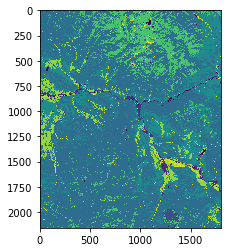

In [4]:
%matplotlib inline
import arcpy
import matplotlib.pyplot as plt
arcpy.env.workspace = r"C:\Geog503\data"
image = arcpy.RasterToNumPyArray("landcover.tif")
plt.imshow(image)
plt.show()

### Generic properties

In [5]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
raster = "landcover.tif"
desc = arcpy.Describe(raster)
print("{0:15} {1}".format("Data type:", desc.dataType))
print("{0:15} {1}".format("File path:", desc.path))
print("{0:15} {1}".format("Catalog path: ", desc.catalogPath))
print("{0:15} {1}".format("File name: ", desc.file))
print("{0:15} {1}".format("Base name: ", desc.baseName))
print("{0:15} {1}".format("Name: ", desc.name))

Data type:      RasterDataset
File path:      C:\Geog503\data
Catalog path:   C:\Geog503\data\landcover.tif
File name:      landcover.tif
Base name:      landcover
Name:           landcover.tif


### Raster Dataset properties

In [6]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
raster = "landcover.tif"
desc = arcpy.Describe(raster)
print("{0:20} {1}".format("dataType :", desc.dataType))
print("{0:20} {1}".format("band Count:", desc.bandCount))
print("{0:20} {1}".format("compressionType: ", desc.compressionType))
print("{0:20} {1}".format("format: ", desc.format))
print("{0:20} {1}".format("permanent: ", desc.permanent))

dataType :           RasterDataset
band Count:          1
compressionType:     None
format:              TIFF
permanent:           True


### Raster Band properties

In [7]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
raster = "landcover.tif"
desc = arcpy.Describe(raster)
print("{0:20} {1}".format("height:", desc.height))
print("{0:20} {1}".format("width:", desc.width))
print("{0:20} {1}".format("isInteger: ", desc.isInteger))
print("{0:20} {1}".format("pixelType: ", desc.pixelType))
print("{0:20} {1}".format("meanCellHeight: ", desc.meanCellHeight))
print("{0:20} {1}".format("meanCellWidth: ", desc.meanCellWidth))

height:              2156
width:               1794
isInteger:           True
pixelType:           U8
meanCellHeight:      30.0
meanCellWidth:       30.0


### Multiband Rasters

In [8]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
raster = "tm.img/Layer_1"    #or Band_1
desc = arcpy.Describe(raster)
print("{0:10} {1}".format("pixelType = ", desc.pixelType))
print("{0:10} {1}".format("height = ", str(desc.height)))
print("{0:10} {1}".format("width = ", str(desc.width)))

pixelType =  U8
height =   1913
width =    1990


## Get band names

In [9]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
raster = "tm.img"    
desc = arcpy.Describe(raster)
bands = desc.children
for band in bands:
    print(band.name)

Layer_1
Layer_2
Layer_3


(3, 1913, 1990)
(1913, 1990, 3)


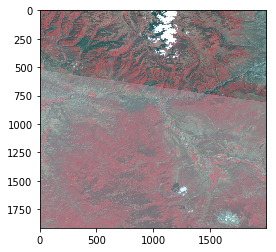

In [10]:
import arcpy
import matplotlib.pyplot as plt
arcpy.env.workspace = r"C:\Geog503\data"
image = arcpy.RasterToNumPyArray("tm.img")
print(image.shape)
image = image.transpose(1, 2, 0)
print(image.shape)
plt.imshow(image)
plt.show()

### Raster Objects

* By referencing an existing raster on disk

In [11]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
in_raster = "Elevation"
outraster = arcpy.Raster(in_raster)

-3.4028235e+38
3942.4353


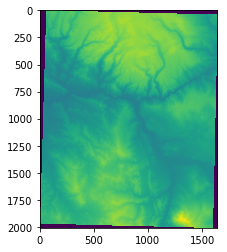

In [12]:
import arcpy
import numpy as np
import matplotlib.pyplot as plt
arcpy.env.workspace = r"C:\Geog503\data"
image = arcpy.RasterToNumPyArray("Elevation")
print(np.min(image))
print(np.max(image))
image[image < 0] = 0
plt.imshow(image)
plt.show()

* By using a map algebra statement

In [13]:
import arcpy
arcpy.CheckOutExtension('Spatial')

u'CheckedOut'

In [14]:
arcpy.env.workspace = r"C:\Geog503\data"
out_raster = arcpy.sa.Hillshade("Elevation")
out_path = r"C:\Geog503\data\Results\hillshade.tif"
out_raster.save(out_path)

### ArcPy Spatial Analyst Module

In [15]:
import arcpy
from arcpy.sa import *
in_raster = arcpy.Raster("C:\Geog503\data\Elevation")
out_raster = Hillshade(in_raster)
out_path = r"C:\Geog503\data\Results\hillshade2.tif"
out_raster.save(out_path)

### Map Algebra

In [16]:
import arcpy
from arcpy.sa import *
arcpy.env.workspace = r"C:\Geog503\data"
r1 = arcpy.Raster("tm.img/Layer_1")
r2 = arcpy.Raster("tm.img/Layer_2")
r3 = arcpy.Raster("tm.img/Layer_3")
out_raster = (r1 + r2 + r3) / 3
out_path = r"C:\Geog503\data\Results\r4.tif"
out_raster.save(out_path)

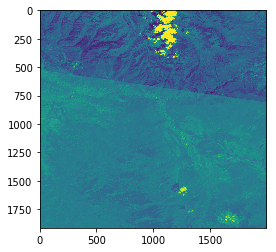

In [17]:
%matplotlib inline
import arcpy
import matplotlib.pyplot as plt
arcpy.env.workspace = r"C:\Geog503\data"
image = arcpy.RasterToNumPyArray(r"Results\r4.tif")
plt.imshow(image)
plt.show()

### ApplyEnvironment Function

In [18]:
import arcpy
arcpy.env.workspace = r"C:\Geog503\data"
elev = arcpy.Raster("Elevation")
tm = arcpy.Raster("tm.img")
arcpy.env.outputCoordinateSystem = elev.spatialReference
arcpy.env.cellSize = elev.meanCellHeight
out_raster = arcpy.sa.ApplyEnvironment(tm)
out_path = r"C:\Geog503\data\Results\applyenv.tif"
out_raster.save(out_path)

### Spatial Analyst classes (arcpy.sa)

* <http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-spatial-analyst/an-overview-of-spatial-analyst-classes.htm>

* [RemapRange Class](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-spatial-analyst/an-overview-of-transformation-classes.htm)


In [19]:
import arcpy
from arcpy.sa import *
arcpy.env.workspace = r"C:\Geog503\data"
in_raster = "Elevation"
remap = arcpy.sa.RemapRange([[1,1000,1],[1000,2000,2],[2000,3000,3],[3000,4000,4]])
out_raster = arcpy.sa.Reclassify(in_raster,"Value",remap)
out_raster.save(r"C:\Geog503\data\Results\remapElev.tif")

2
65535


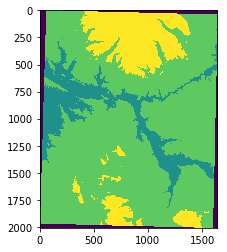

In [20]:
%matplotlib inline
import arcpy
import numpy as np
import matplotlib.pyplot as plt
arcpy.env.workspace = r"C:\Geog503\data"
image = arcpy.RasterToNumPyArray(r"Results\remapElev.tif")
print(np.min(image))
print(np.max(image))
image[image > 4] = 0
plt.imshow(image)
plt.show()

* [Neighborhood Classes](http://desktop.arcgis.com/en/arcmap/latest/analyze/arcpy-spatial-analyst/an-overview-of-neighborhood-classes.htm)

In [21]:
import arcpy
from arcpy.sa import *
arcpy.env.workspace = r"C:\Geog503\data"
arcpy.env.overwriteOutput = True
in_raster = "Elevation"
nbr = NbrRectangle(5,5,"Cell")
out_raster = FocalStatistics(in_raster,nbr,"MEAN")
out_raster.save( r"C:\Geog503\data\Results\focalmean.tif")
del out_raster

-3.4028235e+38
3928.256


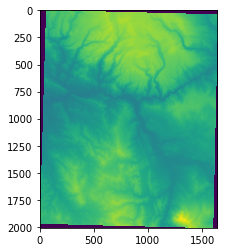

In [22]:
import arcpy
import numpy as np
import matplotlib.pyplot as plt
arcpy.env.workspace = r"C:\Geog503\data"
image = arcpy.RasterToNumPyArray(r"Results\focalmean.tif")
print(np.min(image))
print(np.max(image))
image[image < 0] = 0
plt.imshow(image)
plt.show()

In [23]:
arcpy.CheckInExtension('Spatial')

u'CheckedIn'